<a href="https://colab.research.google.com/github/SaiChandraDevulapally/2303a51l14_27/blob/main/NLP-%20%20AS-4ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.datasets import mnist  # Replace with the actual CO2 dataset if available

# Load and preprocess the dataset
# Load CO2 data - Assuming a time series dataset similar to MNIST for RNN demonstration purposes
(data_train, _), (data_test, _) = mnist.load_data()

# Flatten and normalize the dataset
data_train = data_train.reshape(-1, 28*28) / 255.0
data_test = data_test.reshape(-1, 28*28) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv"
df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0)

# Display the first few rows of the dataset
print(df.head())

# Plot the data
plt.figure(figsize=(10, 6))

            Sales
Month            
1960-01-01   6550
1960-02-01   8728
1960-03-01  12026
1960-04-01  14395
1960-05-01  14587


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,937 (656.00 KB)

 Trainable params: 167,937 (656.00 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:607: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(


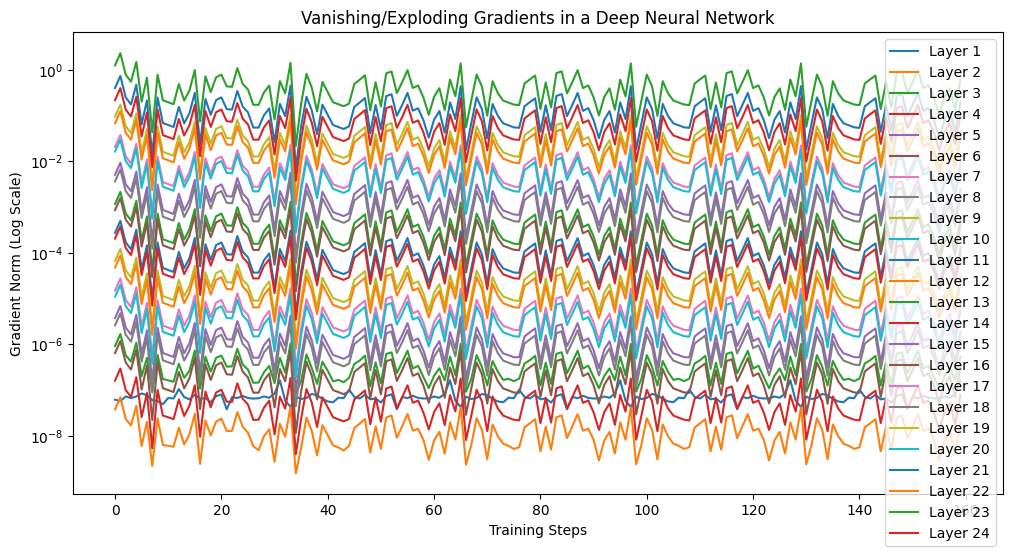

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow import GradientTape # Use tensorflow.GradientTape instead of keras.backend.GradientTape
import tensorflow as tf # Import tensorflow

# Set random seed for reproducibility
np.random.seed(42)

# Generate a simple dataset for demonstration (e.g., random data)
X_train = np.random.randn(1000, 20)  # 1000 samples, 20 features
y_train = np.random.randint(0, 2, 1000)  # Binary labels (0 or 1)

# Define a deep neural network with sigmoid activation (to demonstrate vanishing gradients)
model = Sequential()
model.add(Dense(128, input_dim=20, activation='sigmoid'))
for _ in range(10):  # Add 10 layers
    model.add(Dense(128, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with SGD optimizer and a low learning rate to observe gradient changes
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Function to monitor gradients
def get_gradients(model, X_batch, y_batch):
    """
    Calculate the gradients of the loss with respect to the weights of the model.
    """
    with GradientTape() as tape: # Use GradientTape for automatic differentiation
        predictions = model(X_batch)  # Get predictions for the batch
        loss = model.compiled_loss(y_batch, predictions)  # Calculate the loss

        gradients = tape.gradient(loss, model.trainable_weights)  # Compute gradients
        return gradients

# Train the model and visualize gradients
epochs = 5
batch_size = 32

gradient_norms = []  # To store norms of gradients

for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        # Train on batch
        model.train_on_batch(X_batch, y_batch)

        # Get gradients
        gradients = get_gradients(model, X_batch, y_batch)
        # Calculate L2 norm of gradients for each layer
        norm_gradients = [np.linalg.norm(g) for g in gradients]
        gradient_norms.append(norm_gradients)

# Convert to NumPy array for easier manipulation
gradient_norms = np.array(gradient_norms)

# Plotting the gradients for each layer
plt.figure(figsize=(12, 6))
for layer in range(gradient_norms.shape[1]):
    plt.plot(gradient_norms[:, layer], label=f'Layer {layer+1}')

plt.yscale('log')  # Log scale to better visualize vanishing/exploding gradients
plt.xlabel('Training Steps')
plt.ylabel('Gradient Norm (Log Scale)')
plt.title('Vanishing/Exploding Gradients in a Deep Neural Network')
plt.legend()
plt.show()